# Linear Regression

The formula for a regression line is:
```
Y = βo + β1X + ∈
```

where, 
Y - Dependent variable
X - Independent variable
βo - Intercept
β1 - Slope
∈ - Error

### Assumptions

* Dependent var & independent var are linearly related (change in DV changes IV by a constant amount and is independent of other variables)
* There is no correlation among independent variables (no multicollinearity)
* The error terms has constant variance (no heteroskedestacity)
* The error terms must be uncorrelated i.e. error at ∈t must not indicate the at error at ∈t+1 (no autocorrelation)
* The dependent variable and the error terms must possess a normal distribution.

### Violations

* Residual vs. Fitted Values Plot (shows heteroskedasticity) - should not show any pattern
* Normality Q-Q plot - should show a straight line
* Scale location plot - should not show any pattern

### Accuracy

* Use a different model (e.g. tree-based)
* For non-linearity, transform the IVs using sqrt, log, square, etc.
* For heteroskedasticity, transform the DV using sqrt, log, square, or use weighted least square method
* For multicollinearity, use a correlation matrix to check correlated variables. 

### Assessment

* R Square (Coefficient of Determination) - increases as # of vars increase - use adjusted R^2
* Adjusted R²
* F Statistics - It evaluates the overall significance of the model - the ratio of explained variance by the model by unexplained variance. It compares the full model with an intercept only (no predictors) model. Its value can range between zero and any arbitrary large number. Naturally, higher the F statistics, better the model.
* MSE / MSE / MAE - Lower the number, better the model:
  * MSE - Mean squared error. Amplifies the impact of outliers
  * MAE - Mean absolute error. It is robust against the effect of outliers
  * RMSE - Root mean square error. Tells how far on an average, the residuals are from zero.

[Hackerearth.com - Intro to Linear Regression](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, '# of houses')

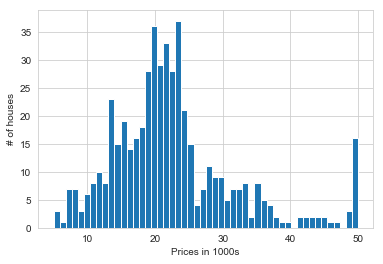

In [4]:
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in 1000s')
plt.ylabel('# of houses')

Text(0.5, 0, '# of rooms')

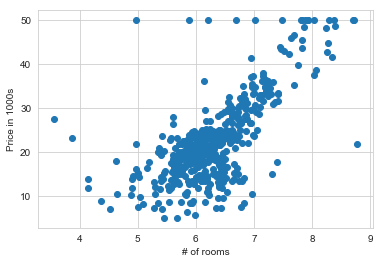

In [5]:
plt.scatter(boston.data[:, 5], boston.target)
plt.ylabel('Price in 1000s')
plt.xlabel('# of rooms')

In [6]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df['Price'] = boston.target

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


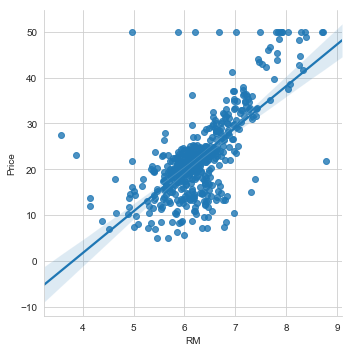

In [10]:
sns.lmplot('RM', 'Price', data=boston_df)

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X = boston_df.drop('Price', 1)
y = boston_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print(' The estimated intercept coefficient is %.2f ' %reg.intercept_)
print(' The number of coefficients used was %d ' % len(reg.coef_))

 The estimated intercept coefficient is 41.05 
 The number of coefficients used was 13 


In [14]:
y_pred = reg.predict(X_test)

In [15]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2', metrics.r2_score(y_test, y_pred))

MAE: 3.555474556662589
MSE: 26.361863287967985
RMSE: 5.1343805164759635
R^2 0.6694221114991419


Text(0.5, 1.0, 'Residual Plots')

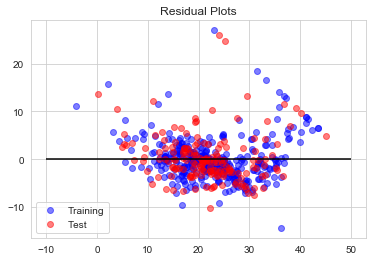

In [16]:
# Residual Plots
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

# Scatter plot the training data
train = plt.scatter(pred_train,(y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')


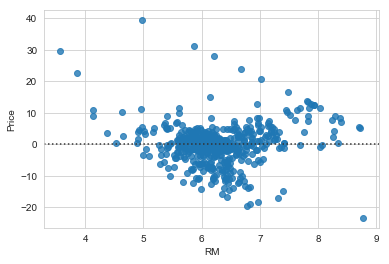

In [17]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)
